In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/SentimentAnalysis/rnn/data/32500HSA-test.csv')

data['CleanText'] = data['CleanText'].astype(str)    # Convert datatype to integer
data.head(20)

,CleanText,Sentiment
0,but if we hit an insurgent network in iraq wit...,0
1,i love your guy s song we are dancing to it fo...,1
2,i was involved in a lot of intense combat with...,0
3,during saddam hussein s rule when the sunni do...,0
4,a proportional u s and allied response to this...,0
5,european countries attacked kosovo and killed ...,0
6,entering syrian airspace would trigger those d...,0
7,meadlo invited me in and agreed to talk,1
8,they re british trained why would they slip up...,0
9,he added it will be important for the iraqi go...,0


### Load RNN Model & Tokanizer

In [3]:
import pickle
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences
import re
from nltk.tokenize import word_tokenize

with open('/content/drive/My Drive/SentimentAnalysis/rnn/tokenizers/tokenizer-rnn-cnn-w2v-mar-27.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)
# load rnn model
rnn_model = load_model('/content/drive/My Drive/SentimentAnalysis/rnn/models/rnn-cnn-w2v-model-mar-27-03-0.9571.hdf5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
test_sequences = tokenizer.texts_to_sequences(data.CleanText)
padded_test_sequences = pad_sequences(test_sequences, maxlen=35)
y_pred = rnn_model.predict(padded_test_sequences, verbose=1, batch_size=2048)
y_pred = pd.DataFrame(y_pred, columns=['Prediction'])
data['Prediction'] = y_pred['Prediction'].map(lambda p: 1 if p >= 0.5 else 0)
data = data.dropna()
data['Prediction'] = data['Prediction'].astype(int)
print(accuracy_score(data['Sentiment'], data['Prediction']*100))

2259/2259 [==============================] - 2s 770us/step
0.787959274015051


#### Accuracy
We got a **78.80%** accuracy which improved from around 77.28% accuracy from last time!

## Analysis
### WordCloud

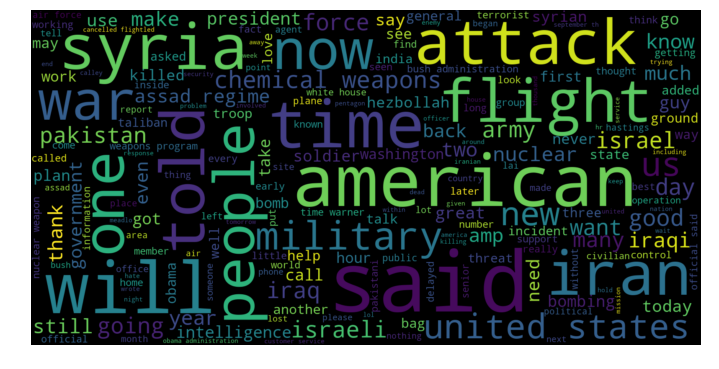

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tweets in a single text
wordcloud_texts = ' '.join(data['CleanText'].tolist()).lower()

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(wordcloud_texts)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Piechart

In [0]:
def plot_pie_chart(positive_count, negative_count, title):
  # Data to plot
  labels = 'Positive', 'Negative'
  sizes = [positive_count, negative_count]
  colors = ['yellowgreen', 'lightcoral']
  explode = (0.1, 0)  # explode 1st slice

  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=140)
  plt.title(title)
  plt.axis('equal')
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.show()

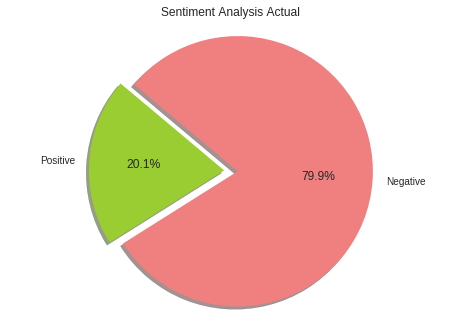

In [7]:
plot_pie_chart(data['Sentiment'].value_counts()[1], data['Sentiment'].value_counts()[0], 
               'Sentiment Analysis Actual')

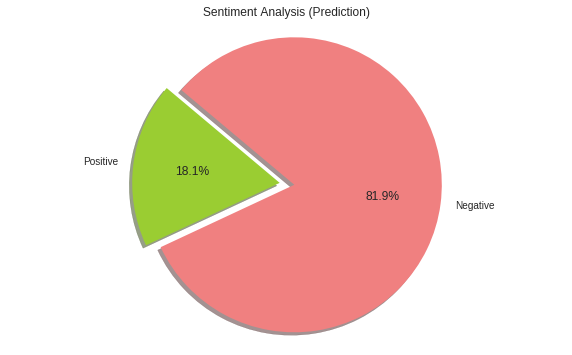

In [8]:
plot_pie_chart(data['Prediction'].value_counts()[1], data['Prediction'].value_counts()[0],
              'Sentiment Analysis (Prediction)')

In [9]:
data

,CleanText,Sentiment,Prediction
0,but if we hit an insurgent network in iraq wit...,0,0
1,i love your guy s song we are dancing to it fo...,1,1
2,i was involved in a lot of intense combat with...,0,0
3,during saddam hussein s rule when the sunni do...,0,0
4,a proportional u s and allied response to this...,0,0
5,european countries attacked kosovo and killed ...,0,0
6,entering syrian airspace would trigger those d...,0,0
7,meadlo invited me in and agreed to talk,1,1
8,they re british trained why would they slip up...,0,0
9,he added it will be important for the iraqi go...,0,0
